# Resoure Preparation

### Drive Mount

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


### Setup Library

In [ ]:
!pip -q install tensorflow_text
!pip -q install pythainlp 
!pip -q install python-crfsuite

     |████████████████████████████████| 4.6 MB 5.1 MB/s 
     |████████████████████████████████| 511.7 MB 6.4 kB/s 
     |████████████████████████████████| 438 kB 65.8 MB/s 
     |████████████████████████████████| 1.6 MB 52.8 MB/s 
     |████████████████████████████████| 5.8 MB 25.3 MB/s 
     |████████████████████████████████| 11.5 MB 937 kB/s 
     |████████████████████████████████| 965 kB 4.8 MB/s 


In [ ]:
import pandas as pd
import numpy as np

from pythainlp import word_tokenize
import re

import gdown
from google.colab import drive

In [ ]:
driveURL = "https://drive.google.com/file/d/1ShyXkcRa-Yl2xDtdUqebBmwBEC_AhqH1/view?usp=sharing"
downloadURL = 'https://drive.google.com/uc?export=download&id='+driveURL.split('/')[-2]
gdown.download(downloadURL)
!unzip TNC_DataSet_5000_V1.zip

Downloading...
From: https://drive.google.com/uc?export=download&id=1ShyXkcRa-Yl2xDtdUqebBmwBEC_AhqH1
To: /content/TNC_DataSet_5000_V1.zip
100%|██████████| 46.9M/46.9M [00:00<00:00, 205MB/s]


Archive:  TNC_DataSet_5000_V1.zip
  inflating: dataset_info.txt        
  inflating: TNC_AllDomain_5000.csv  
  inflating: TNC_TestSet_5000.csv    
  inflating: TNC_TrainSet_5000.csv   
  inflating: TNC_ValidationSet_5000.csv  


# Data Preprocessing

In [ ]:
def replace_url(text):
    URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""
    return re.sub(URL_PATTERN, 'xxurl', text)

def replace_rep(text):
    def _replace_rep(m):
        c,cc = m.groups()
        return f'{c}xxrep'
    re_rep = re.compile(r'(\S)(\1{2,})')
    return re_rep.sub(_replace_rep, text)

def process_text(text):
    #pre rules
    res = text.lower().strip() # 'AAAA'
    res = replace_url(res)
    res = replace_rep(res) # 'แมวนอนกินปลา' => 'แมว นอน กิน ปลา'
    
    #tokenize
    res = [word for word in word_tokenize(res) if word and not re.search(pattern=r"\s+", string=word)]
    return res
    
DOMAIN_DICT = {
      0 : 'Imaginative',
      1 : 'Natural & Pure Science',
      2 : 'Applied Science',
      3 : 'Social Science ',
      4 : 'History',
      5 : 'Commerce & Finance',
      6 : 'Arts',
      7 : 'Belief & Thought'
  }

In [ ]:
train_df = pd.read_csv("TNC_TrainSet_5000.csv")
valid_df = pd.read_csv("TNC_ValidationSet_5000.csv")
test_df = pd.read_csv("TNC_TestSet_5000.csv")
all_df = pd.concat([train_df,valid_df,test_df]).reset_index(drop=True)

#Data Preprocessing
train_df['Processed'] = train_df.Texts.map(lambda x: '|'.join(process_text(x)))
valid_df['Processed'] = valid_df.Texts.map(lambda x: '|'.join(process_text(x)))
test_df['Processed'] = test_df.Texts.map(lambda x: '|'.join(process_text(x)))

#Shuffle Row
train_df = train_df.sample(frac=1,random_state=69).reset_index(drop=True)
valid_df = valid_df.sample(frac=1,random_state=69).reset_index(drop=True)
test_df = test_df.sample(frac=1,random_state=69).reset_index(drop=True)

# Train a Long Short-Term Moemory (LSTM) Model

In [ ]:
import tensorflow as tf 


text_train = [' '.join(x.split('|')) for x in train_df['Processed'].values.tolist()]
text_valid = [' '.join(x.split('|')) for x in valid_df['Processed'].values.tolist()]
text_test = [' '.join(x.split('|')) for x in test_df['Processed'].values.tolist()]

word_count = []
for sent in text_train:
  for w in sent.split():
      word_count.append(w)


VOCAB_SIZE = len(set(word_count))
encoder = tf.keras.layers.TextVectorization(max_tokens=VOCAB_SIZE)
encoder.adapt(text_train)

vocab = np.array(encoder.get_vocabulary())

word_count[:5], VOCAB_SIZE 

(['สังคีต', 'ลักษณ์', 'รอน', 'โด', 'ของ'], 57480)

In [ ]:
y_train = train_df['Category']
y_valid = valid_df['Category']
y_test = test_df['Category']
y_class = list(DOMAIN_DICT.values())
y_class

['Imaginative',
 'Natural & Pure Science',
 'Applied Science',
 'Social Science ',
 'History',
 'Commerce & Finance',
 'Arts',
 'Belief & Thought']

In [ ]:
from sklearn import preprocessing
from tensorflow.keras.utils import to_categorical

le = preprocessing.LabelEncoder()
le.fit(y_class)
y_train = le.transform(y_train)
y_val = le.transform(y_valid)
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)
print(y_train.shape)

(25200, 8)


In [ ]:
model = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(
        input_dim=len(encoder.get_vocabulary()),
        output_dim=512,
        # Use masking to handle the variable sequence lengths
        mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(256)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(y_train.shape[1], activation='softmax')
])

model.compile(loss='categorical_crossentropy',
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [ ]:
y_train.size

201600

In [ ]:
EPOCHS = 5
BATCH_SIZE = 250
checkpoint_path = '/content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/checkpoint2/CP_{epoch:04d}.ckpt'

STEPS_PER_EPOCH = y_train.size / BATCH_SIZE
SAVE_PERIOD = 1

# Create a callback that saves the model's weights every 2 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path, 
                                                 verbose=1, 
                                                 save_weights_only=True,
                                                 save_best_only = True,
                                                 #save_freq= int(SAVE_PERIOD * STEPS_PER_EPOCH)
                                                )

# Train the model with the new callback
def train_model():
  model.fit(np.array(text_train),
            y_train, 
            validation_data=(np.array(text_valid), y_val),
            epochs=EPOCHS,
            batch_size = BATCH_SIZE,
            callbacks = [cp_callback],
            verbose=2)

In [ ]:
#Load Model 
model.load_weights('/content/drive/MyDrive/AIB/TNC_LSTM_5000/checkpoint2/CP-Lastest')

In [ ]:
train_model()
model.save_weights('/content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/checkpoint3/CP-Lastest')

Epoch 1/5

Epoch 1: val_loss improved from inf to 1.68156, saving model to /content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/checkpoint2/CP_0001.ckpt
101/101 - 3728s - loss: 0.0512 - accuracy: 0.9898 - val_loss: 1.6816 - val_accuracy: 0.7050 - 3728s/epoch - 37s/step
Epoch 2/5

Epoch 2: val_loss did not improve from 1.68156
101/101 - 3706s - loss: 0.0457 - accuracy: 0.9900 - val_loss: 1.8314 - val_accuracy: 0.7059 - 3706s/epoch - 37s/step
Epoch 3/5

Epoch 3: val_loss did not improve from 1.68156
101/101 - 3682s - loss: 0.0374 - accuracy: 0.9923 - val_loss: 1.8083 - val_accuracy: 0.7020 - 3682s/epoch - 36s/step
Epoch 4/5

Epoch 4: val_loss did not improve from 1.68156
101/101 - 3715s - loss: 0.0318 - accuracy: 0.9932 - val_loss: 1.7369 - val_accuracy: 0.6930 - 3715s/epoch - 37s/step
Epoch 5/5

Epoch 5: val_loss improved from 1.68156 to 1.40053, saving model to /content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/checkpoint2/CP_0005.ckpt
101/101 - 3728s - loss: 0.0795 - accuracy: 0.9817 - va

In [ ]:
!mkdir -p saved_model
model.save('/content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/saved_model/my_model')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/saved_model/my_model/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/Programs/AIB/TNC_LSTM_5000/saved_model/my_model/assets


# Model Evaluation

### Evaluate on validation set 

In [ ]:
from sklearn.metrics import classification_report
value = model.predict(np.array(text_valid))
y_val_pred = np.argmax(value,axis=1)
y_val_true = np.argmax(y_val,axis=1)
print(classification_report(y_val_true, y_val_pred))

85/85 [==============================] - 130s 2s/step
              precision    recall  f1-score   support

           0       0.66      0.56      0.61       337
           1       0.65      0.37      0.48       337
           2       0.55      0.78      0.64       337
           3       0.82      0.93      0.87       337
           4       0.95      0.98      0.97       337
           5       0.94      0.86      0.90       337
           6       0.61      0.68      0.64       337
           7       0.74      0.72      0.73       337

    accuracy                           0.74      2696
   macro avg       0.74      0.74      0.73      2696
weighted avg       0.74      0.74      0.73      2696



In [ ]:
#confusion matrix
import numpy
import matplotlib
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from matplotlib.pyplot import figure


cm = confusion_matrix(y_val_true, y_val_pred, labels=[0,1,2,3,4,5,6,7])
cm

array([[190,  49,  23,  29,   0,   0,  24,  22],
       [ 58, 126,  63,   5,   0,   3,  62,  20],
       [  3,   5, 263,   0,   0,  11,  52,   3],
       [  1,   1,   0, 314,   0,   0,   0,  21],
       [  0,   0,   0,   1, 331,   0,   0,   5],
       [  0,   0,  45,   0,   0, 289,   3,   0],
       [ 34,   4,  56,   2,   0,   1, 228,  12],
       [  3,   8,  29,  33,  16,   2,   4, 242]])

<Figure size 100000x300000 with 0 Axes>

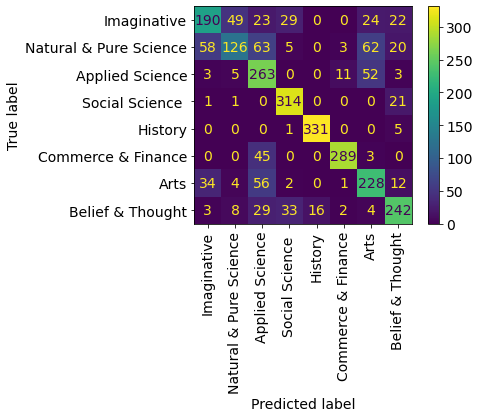

In [ ]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=y_class)

font = {'family' : 'normal',
        'size'   : 14}

matplotlib.rc('font', **font)

figure(figsize=(100, 300), dpi=1000)
disp.plot()
plt.xticks(rotation='vertical')
plt.show()